C:\Users\user\AppData\Local\Temp\ipykernel_12764\3777714963.py:6: DtypeWarning: Columns (0,8,9,10,13,16,18,19,20,21,22,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_data = pd.read_csv("./mapped_data/mapped_merged_data.csv")


Missing values in each column:
 TRAVEL_ID            0
VISIT_AREA_ID        0
ACTIVITY_TYPE_CD     0
ACTIVITY_TYPE_SEQ    0
CONSUME_HIS_SEQ      0
CONSUME_HIS_SNO      0
PAYMENT_NUM          0
BRNO                 0
STORE_NM             0
ROAD_NM_ADDR         0
LOTNO_ADDR           0
ROAD_NM_CD           0
LOTNO_CD             0
PAYMENT_DT           0
PAYMENT_MTHD_SE      0
PAYMENT_AMT_WON      0
PAYMENT_ETC          0
SGG_CD               0
POI_ID               0
POI_NM               0
BRNO_POI             0
ROAD_NM_ADDR_POI     0
LOTNO_ADDR_POI       0
ASORT_LCLASDC        0
ASORT_MLSFCDC        0
ASORT_SDASDC         0
X_COORD              0
Y_COORD              0
ROAD_NM_CD_POI       0
LOTNO_CD_POI         0
region               0
dtype: int64


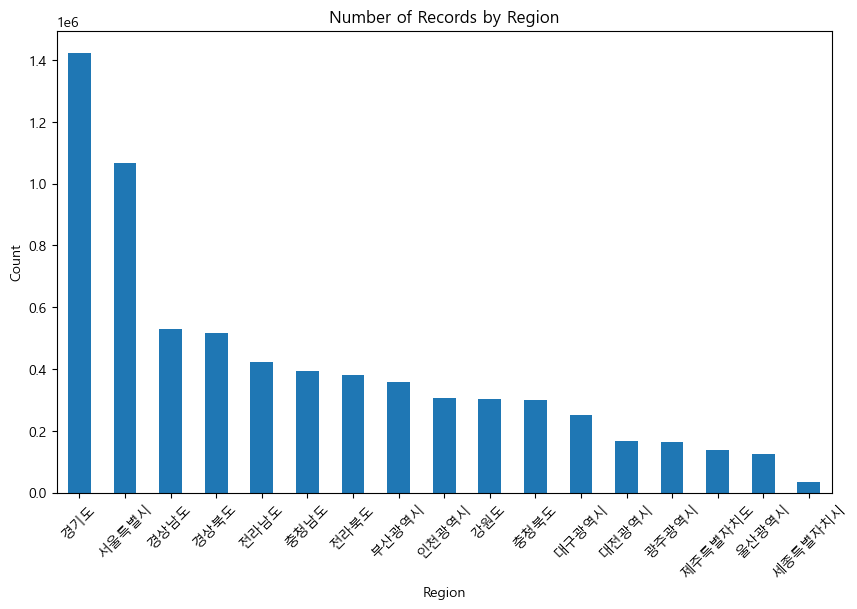

In [1]:
from matplotlib import rc

import matplotlib.pyplot as plt
import pandas as pd

merged_data = pd.read_csv("./mapped_data/mapped_merged_data.csv")


# 한글 폰트 설정
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

import numpy as np
# 결측값 처리
def handle_missing_values(data):
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    data[numeric_columns] = data[numeric_columns].fillna(0)

    categorical_columns = data.select_dtypes(include=['object']).columns
    data[categorical_columns] = data[categorical_columns].fillna('unknown')

    return data


merged_data = handle_missing_values(merged_data)

# 결측치 확인
missing_values = merged_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# 'unknown' 값 제거
merged_data = merged_data[merged_data['region'] != 'unknown']

import matplotlib.pyplot as plt

region_counts = merged_data['region'].value_counts()

region_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Records by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [2]:
merged_data.dtypes

TRAVEL_ID             object
VISIT_AREA_ID        float64
ACTIVITY_TYPE_CD     float64
ACTIVITY_TYPE_SEQ    float64
CONSUME_HIS_SEQ      float64
CONSUME_HIS_SNO      float64
PAYMENT_NUM          float64
BRNO                 float64
STORE_NM              object
ROAD_NM_ADDR          object
LOTNO_ADDR            object
ROAD_NM_CD           float64
LOTNO_CD             float64
PAYMENT_DT            object
PAYMENT_MTHD_SE      float64
PAYMENT_AMT_WON      float64
PAYMENT_ETC           object
SGG_CD                 int64
POI_ID                object
POI_NM                object
BRNO_POI              object
ROAD_NM_ADDR_POI      object
LOTNO_ADDR_POI        object
ASORT_LCLASDC        float64
ASORT_MLSFCDC        float64
ASORT_SDASDC         float64
X_COORD              float64
Y_COORD              float64
ROAD_NM_CD_POI        object
LOTNO_CD_POI          object
region                object
dtype: object

In [3]:
from sklearn.preprocessing import LabelEncoder

# 1. 범주형 및 숫자형 데이터 구분
categorical_columns = merged_data.select_dtypes(include=["object", "category"]).columns
numeric_columns = merged_data.select_dtypes(include=["number"]).columns

# 2. 범주형 데이터 Label Encoding (region 열 제외)
label_encoders = {}
for col in categorical_columns:
    if col != "region":  # region 열 제외
        le = LabelEncoder()
        merged_data[col] = le.fit_transform(merged_data[col].astype(str))
        label_encoders[col] = le  # Save the encoder for potential inverse transformations

# 3. 확인
print("Encoded categorical columns:", categorical_columns)

Encoded categorical columns: Index(['TRAVEL_ID', 'STORE_NM', 'ROAD_NM_ADDR', 'LOTNO_ADDR', 'PAYMENT_DT',
       'PAYMENT_ETC', 'POI_ID', 'POI_NM', 'BRNO_POI', 'ROAD_NM_ADDR_POI',
       'LOTNO_ADDR_POI', 'ROAD_NM_CD_POI', 'LOTNO_CD_POI', 'region'],
      dtype='object')


In [4]:
merged_data.dtypes

TRAVEL_ID              int32
VISIT_AREA_ID        float64
ACTIVITY_TYPE_CD     float64
ACTIVITY_TYPE_SEQ    float64
CONSUME_HIS_SEQ      float64
CONSUME_HIS_SNO      float64
PAYMENT_NUM          float64
BRNO                 float64
STORE_NM               int32
ROAD_NM_ADDR           int32
LOTNO_ADDR             int32
ROAD_NM_CD           float64
LOTNO_CD             float64
PAYMENT_DT             int32
PAYMENT_MTHD_SE      float64
PAYMENT_AMT_WON      float64
PAYMENT_ETC            int32
SGG_CD                 int64
POI_ID                 int32
POI_NM                 int32
BRNO_POI               int32
ROAD_NM_ADDR_POI       int32
LOTNO_ADDR_POI         int32
ASORT_LCLASDC        float64
ASORT_MLSFCDC        float64
ASORT_SDASDC         float64
X_COORD              float64
Y_COORD              float64
ROAD_NM_CD_POI         int32
LOTNO_CD_POI           int32
region                object
dtype: object

In [ ]:
# 모든 열의 통계값 확인
scaled_columns = merged_data.drop(columns=["region"]).columns
stats = merged_data[scaled_columns].agg(["mean", "std", "min", "max"]).T

# 스케일링 확인
print(stats)


                           mean           std   min           max
TRAVEL_ID          6.169494e+03  1.483228e+02   0.0  6.175000e+03
VISIT_AREA_ID      4.301400e+06  9.739731e+07   0.0  2.211130e+09
ACTIVITY_TYPE_CD   3.560680e-03  9.772472e-02   0.0  7.000000e+00
ACTIVITY_TYPE_SEQ  1.196966e-03  6.091971e-02   0.0  1.300000e+01
CONSUME_HIS_SEQ    1.196966e-03  6.091971e-02   0.0  1.300000e+01
CONSUME_HIS_SNO    0.000000e+00  0.000000e+00   0.0  0.000000e+00
PAYMENT_NUM        4.540306e-03  1.219524e-01   0.0  2.200000e+01
BRNO               0.000000e+00  0.000000e+00   0.0  0.000000e+00
STORE_NM           5.614205e+02  2.532150e+02   0.0  1.074100e+04
ROAD_NM_ADDR       6.293302e+00  1.178094e+02   0.0  6.356000e+03
LOTNO_ADDR         1.452805e-07  3.811568e-04   0.0  1.000000e+00
ROAD_NM_CD         0.000000e+00  0.000000e+00   0.0  0.000000e+00
LOTNO_CD           0.000000e+00  0.000000e+00   0.0  0.000000e+00
PAYMENT_DT         0.000000e+00  0.000000e+00   0.0  0.000000e+00
PAYMENT_MT

In [10]:
unique_regions = merged_data["region"].unique()
print("고유한 지역 목록:", unique_regions)


고유한 지역 목록: ['서울특별시' '부산광역시' '대구광역시' '인천광역시' '광주광역시' '대전광역시' '울산광역시' '세종특별자치시' '경기도'
 '강원도' '충청북도' '충청남도' '전라북도' '전라남도' '경상북도' '경상남도' '제주특별자치도']


In [18]:
# 'region' 열의 고유 지역 목록 가져오기
unique_regions = merged_data["region"].unique()

# 각 지역별로 이진 레이블 생성
for region in unique_regions:
    label_col = f"region_{region}"  # 예: region_서울특별시
    merged_data[label_col] = merged_data["region"].apply(lambda x: 1 if x == region else 0)




In [21]:
from sklearn.preprocessing import StandardScaler

# 'region_'으로 시작하는 열과 'region' 열 찾기
exclude_columns = ["region"] + [col for col in merged_data.columns if col.startswith("region_")]

# 스케일링 대상 열 정의
numeric_features = merged_data.drop(columns=exclude_columns).columns

# StandardScaler를 사용한 스케일링
scaler = StandardScaler()
merged_data[numeric_features] = scaler.fit_transform(merged_data[numeric_features])

# 스케일링 결과 확인
stats = merged_data[numeric_features].agg(["mean", "std", "min", "max"]).T
print("스케일링 결과:")
print(stats)


스케일링 결과:
                           mean  std        min          max
TRAVEL_ID         -2.910530e-15  1.0 -41.595049     0.037124
VISIT_AREA_ID     -1.082242e-17  1.0  -0.044163    22.658005
ACTIVITY_TYPE_CD  -4.203444e-18  1.0  -0.036436    71.593345
ACTIVITY_TYPE_SEQ  3.189333e-17  1.0  -0.019648   213.375998
CONSUME_HIS_SEQ    3.189333e-17  1.0  -0.019648   213.375998
CONSUME_HIS_SNO    0.000000e+00  0.0   0.000000     0.000000
PAYMENT_NUM        2.354590e-16  1.0  -0.037230   180.361067
BRNO               0.000000e+00  0.0   0.000000     0.000000
STORE_NM          -2.691361e-17  1.0  -2.217169    40.201327
ROAD_NM_ADDR       1.471309e-17  1.0  -0.053419    53.898132
LOTNO_ADDR        -1.603776e-18  1.0  -0.000381  2623.592003
ROAD_NM_CD         0.000000e+00  0.0   0.000000     0.000000
LOTNO_CD           0.000000e+00  0.0   0.000000     0.000000
PAYMENT_DT         0.000000e+00  0.0   0.000000     0.000000
PAYMENT_MTHD_SE   -1.571130e-17  1.0  -0.036156    46.911733
PAYMENT_AMT_WON

In [19]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import classification_report

# 사용할 특성 정의
features = [
    'SGG_CD', 'X_COORD', 'Y_COORD', 'TRAVEL_ID', 'LOTNO_ADDR_POI',
    'VISIT_AREA_ID', 'LOTNO_CD_POI', 'POI_ID', 'STORE_NM', 'POI_NM'
]

# 사용할 라벨링된 지역 열 리스트
region_columns = [
    'region_서울특별시', 'region_부산광역시', 'region_대구광역시', 'region_인천광역시',
    'region_광주광역시', 'region_대전광역시', 'region_울산광역시', 'region_세종특별자치시',
    'region_경기도', 'region_강원도', 'region_충청북도', 'region_충청남도',
    'region_전라북도', 'region_전라남도', 'region_경상북도', 'region_경상남도', 'region_제주특별자치도'
]

# PyTorch Dataset 정의
class RegionDataset(Dataset):
    def __init__(self, data, features, target):
        self.features = data[features].values
        self.labels = data[target].values

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return torch.tensor(self.features[idx], dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.long)

# Transformer 모델 정의
class TransformerClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(TransformerClassifier, self).__init__()
        self.embedding = nn.Linear(input_dim, 64)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=64, nhead=4, dim_feedforward=128, dropout=0.1),
            num_layers=3
        )
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x.unsqueeze(1))
        x = x.mean(dim=1)
        return self.fc(x)

# 학습 및 평가 함수 정의
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for features_batch, labels_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(features_batch)
            loss = criterion(outputs, labels_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader):.4f}")

def evaluate_model(model, test_loader):
    model.eval()
    predictions, targets = [], []
    with torch.no_grad():
        for features_batch, labels_batch in test_loader:
            outputs = model(features_batch)
            _, preds = torch.max(outputs, dim=1)
            predictions.extend(preds.numpy())
            targets.extend(labels_batch.numpy())
    return classification_report(targets, predictions, output_dict=True)

# 결과 저장용 사전
results = {}

# 지역별 모델 학습 및 평가
for region in region_columns:
    print(f"\n=== Processing for {region} ===")
    
    # 데이터 분리 (현재 region 열을 타겟으로 설정)
    train_data = merged_data.sample(frac=0.8, random_state=42)
    test_data = merged_data.drop(train_data.index)

    train_dataset = RegionDataset(train_data, features, region)
    test_dataset = RegionDataset(test_data, features, region)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Transformer 모델 초기화
    model = TransformerClassifier(input_dim=len(features), num_classes=2)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # 학습
    train_model(model, train_loader, criterion, optimizer)

    # 평가
    report = evaluate_model(model, test_loader)
    results[region] = report

    print(f"\n=== Results for {region} ===")
    print(f"Accuracy: {report['accuracy']:.4f}")
    print(f"F1-Score for '1' (target region): {report['1']['f1-score']:.4f}")

# 결과 요약 출력
print("\n=== Final Results Summary ===")
for region, report in results.items():
    print(f"\nRegion: {region}")
    print(f"Accuracy: {report['accuracy']:.4f}")
    print(f"F1-Score for '1' (target region): {report['1']['f1-score']:.4f}")


Index(['TRAVEL_ID', 'VISIT_AREA_ID', 'ACTIVITY_TYPE_CD', 'ACTIVITY_TYPE_SEQ',
       'CONSUME_HIS_SEQ', 'CONSUME_HIS_SNO', 'PAYMENT_NUM', 'BRNO', 'STORE_NM',
       'ROAD_NM_ADDR', 'LOTNO_ADDR', 'ROAD_NM_CD', 'LOTNO_CD', 'PAYMENT_DT',
       'PAYMENT_MTHD_SE', 'PAYMENT_AMT_WON', 'PAYMENT_ETC', 'SGG_CD', 'POI_ID',
       'POI_NM', 'BRNO_POI', 'ROAD_NM_ADDR_POI', 'LOTNO_ADDR_POI',
       'ASORT_LCLASDC', 'ASORT_MLSFCDC', 'ASORT_SDASDC', 'X_COORD', 'Y_COORD',
       'ROAD_NM_CD_POI', 'LOTNO_CD_POI', 'region', 'region_서울특별시',
       'region_부산광역시', 'region_대구광역시', 'region_인천광역시', 'region_광주광역시',
       'region_대전광역시', 'region_울산광역시', 'region_세종특별자치시', 'region_경기도',
       'region_강원도', 'region_충청북도', 'region_충청남도', 'region_전라북도',
       'region_전라남도', 'region_경상북도', 'region_경상남도', 'region_제주특별자치도'],
      dtype='object')